#### Importing the necessary libraries

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

#### loading the dataset

In [2]:
iris_data = load_iris()

#### Extracting the features

In [3]:
iris_df = pd.DataFrame(iris_data.data,columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'] )
iris_df.head(5)

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# Original classes
iris_Y = iris_data['target']
iris_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Plot a Dendrogram

Text(0, 0.5, 'Euclidean distance in the space with other variables')

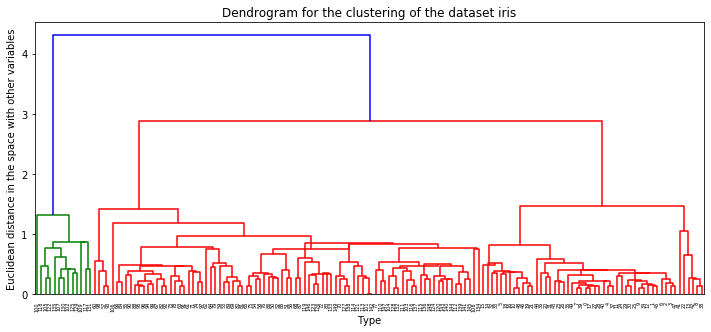

In [6]:
Z = sch.linkage(iris_df, method = 'median')
plt.figure(figsize=(12,5))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

from the above created dendrogram, we can decide to make 3 clusters for this dataset.

#### Reducing the dimensionality of the Data

In [7]:
pca = PCA(n_components=2, random_state=420)
pca_features = pca.fit_transform(iris_df)
pca_features = pd.DataFrame(pca_features) 
pca_features.columns = ['P1', 'P2'] 

#### Fitting the Model

In [8]:
ac = AgglomerativeClustering(n_clusters=3)
model = ac.fit(iris_df)
model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [9]:
#### Predicted class labels
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

#### Visualizing the clustering

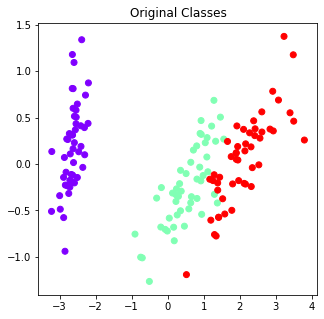

In [10]:
plt.figure(figsize =(5,5)) 
plt.title('Original Classes')
plt.scatter(pca_features['P1'], pca_features['P2'], c = iris_Y, cmap ='rainbow') 
plt.show() 

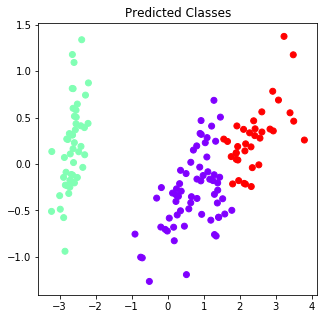

In [11]:
plt.figure(figsize =(5,5)) 
plt.title('Predicted Classes')
plt.scatter(pca_features['P1'], pca_features['P2'], c = model.labels_, cmap ='rainbow') 
plt.show() 

#### Calculating the error

In [12]:
score = mean_squared_error(iris_Y,model.labels_)
abs_error = np.sqrt(score)
abs_error

1.0327955589886444

Text(0.5, 15.0, 'Predicted label')

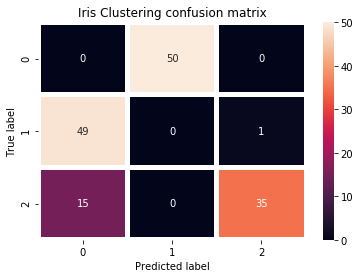

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm = confusion_matrix(iris_Y, model.labels_)
sns.heatmap(cfm, annot = True,  linewidths=4)
plt.title('Iris Clustering confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Here, cluster type-1 is named type-0 and type-0 is named type-1 after clustering. Rearranging the cluster names.

In [14]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cfm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cfm[:, js]

C:\Users\svissams\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
C:\Users\svissams\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


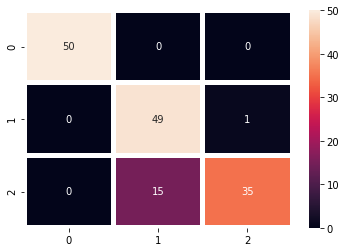

In [15]:
sns.heatmap(cm2, annot = True,  linewidths=4)